In [1]:
import numpy as np 
import pandas as pd
import psycopg2 as ps
from pandasql import sqldf
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
from sqlalchemy import create_engine
engine = create_engine('postgresql+psycopg2:/')
dff = pd.read_sql("""	select 
		tt."channel", 
		sum(tt.spend_time) as spend_time_sek, 
		count(distinct tt.device_id) as uniq_resp,
		count(distinct tt."title") as uniq_post_view,
		count(tt."title") as all_post_view
	from public.telegram tt 
	where tt."channel" is not null 
	group by tt."channel"
    """ , con=engine)

In [108]:
spend_time = """select channel, spend_time_sek as spend_time
                from dff
                order by spend_time_sek DESC
                --limit 11"""
uniq_resp = """select channel, uniq_resp
                from dff
                order by uniq_resp DESC
                --limit 11"""
uniq_post = """select channel, uniq_post_view as uniq_post
                from dff
                order by uniq_post_view DESC
                --limit 11"""
all_post = """select channel, all_post_view as all_post
                from dff
                order by all_post_view DESC
                --limit 11"""
a = sqldf(spend_time)
b = sqldf(uniq_resp)
c = sqldf(uniq_post)
d = sqldf(all_post)
# Ренэйсм столбцов - подготовка к визуализации 
a.rename({'channel': 'name', 'spend_time': 'value'}, axis=1, inplace=True)
a['group'] = 'SpendTime'

b.rename({'channel': 'name', 'uniq_resp': 'value'}, axis=1, inplace=True)
b['group'] = 'UniqResp'

c.rename({'channel': 'name', 'uniq_post': 'value'}, axis=1, inplace=True)
c['group'] = 'UniqPost'

d.rename({'channel': 'name', 'all_post': 'value'}, axis=1, inplace=True)
d['group'] = 'AllPost'

In [135]:
norm_a = pd.DataFrame(a)
norm_b = pd.DataFrame(b)
norm_c = pd.DataFrame(c)
norm_d = pd.DataFrame(d)
norm = pd.DataFrame()
norm['a'] = norm_a['value']
norm['b'] = norm_b['value']
norm['c'] = norm_c['value']
norm['d'] = norm_d['value']
norm

,a,b,c,d
0,273752.919,235,4470,17132
1,248254.652,151,4457,13657
2,198093.102,138,4008,13408
3,179927.275,118,3706,12607
4,172596.996,110,3191,12455
...,...,...,...,...
11844,0.020,1,1,1
11845,0.018,1,1,1
11846,0.017,1,1,1
11847,0.013,1,1,1


In [366]:
df_rank

,name,value,group
0,"Мир сегодня с ""Юрий Подоляка""",4563,SpendTime
1,СОЛОВЬЁВ,4138,SpendTime
2,Война История Оружие,3302,SpendTime
3,Топор Live,2999,SpendTime
4,Сolonelcassad,2877,SpendTime
5,РИА Новости,2430,SpendTime
6,Операция Z: Военкоры Русской Весны,2333,SpendTime
7,Мир Михаила Онуфриенко,1697,SpendTime
8,Топор 18+,1332,SpendTime
9,Яков Кедми,1212,SpendTime


In [137]:
dataNorm = preprocessing.MinMaxScaler().fit_transform(norm.values)
vrem = pd.DataFrame(dataNorm)
vrem
norm_a['value'] = vrem[0]
norm_b['value'] = vrem[1]
norm_c['value'] = vrem[2]
norm_d['value'] = vrem[3]
a = norm_a[:10]
b = norm_b[:10]
c = norm_c[:10]
d = norm_d[:10]

In [172]:
df = pd.concat([a, b, c, d], axis=0)
df = df.reset_index(drop=True)
df['value'] = df['value'] * 100
df

,name,value,group
0,"Мир сегодня с ""Юрий Подоляка""",100.000000,SpendTime
1,СОЛОВЬЁВ,90.685664,SpendTime
2,Война История Оружие,72.362005,SpendTime
3,Топор Live,65.726157,SpendTime
4,Сolonelcassad,63.048458,SpendTime
5,РИА Новости,53.264177,SpendTime
6,Операция Z: Военкоры Русской Весны,51.139110,SpendTime
7,Мир Михаила Онуфриенко,37.203153,SpendTime
8,Топор 18+,29.195059,SpendTime
9,Яков Кедми,26.569263,SpendTime


In [173]:
def get_label_rotation(angle, offset):
    # Rotation must be specified in degrees :(
    rotation = np.rad2deg(angle + offset)
    if angle <= np.pi:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"
    return rotation, alignment

In [230]:
def autolabel(rects, labels=None, height_factor=1.01):
    for i, rect in enumerate(rects):
        height = rect.get_height()
        if labels is not None:
            try:
                label = labels[i]
            except (TypeError, KeyError):
                label = ' '
        else:
            label = '%d' % int(height)
        ax.text(rect.get_x() + rect.get_width()/2., height_factor*height,
                '{}'.format(label),
                ha='center', va='bottom')


In [264]:
def add_labels(angles, values, labels, offset, ax):
    
    # This is the space between the end of the bar and the label
    padding = 4
    
    # Iterate over angles, values, and labels, to add all of them.
    for angle, value, label, in zip(angles, values, labels):
        angle = angle
        
        # Obtain text rotation and alignment
        rotation, alignment = get_label_rotation(angle, offset)

        # And finally add the text
        ax.text(
            x=angle, 
            y=value + padding, 
            s=label, 
            ha=alignment, 
            va="center", 
            rotation=rotation, 
            rotation_mode="anchor",
            size='x-large'
        ) 


In [349]:
def add_values(angles, values, labels, offset, ax):
    
    # This is the space between the end of the bar and the label
    padding = 125
    
    # Iterate over angles, values, and labels, to add all of them.
    for angle, value, label, in zip(angles, values, labels):
        angle = angle
        
        # Obtain text rotation and alignment
        rotation, alignment = get_label_rotation(angle, offset)

        # And finally add the text
        ax.text(
            x=angle, 
            y=5, 
            s=label, 
            ha=alignment, 
            va="center", 
            rotation=rotation, 
            rotation_mode="anchor",
            size='medium',
            color='#FFFFFF'
        ) 

In [338]:
# Reorder the dataframe
df_sorted = (
    df
    .groupby(["group"])
    .apply(lambda x: x.sort_values(["value"], ascending = True))
    .reset_index(drop=True)
)

C:\Users\mikhail.gidroets\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 128293 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\mikhail.gidroets\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 128293 missing from current font.
  font.set_text(s, 0, flags=flags)


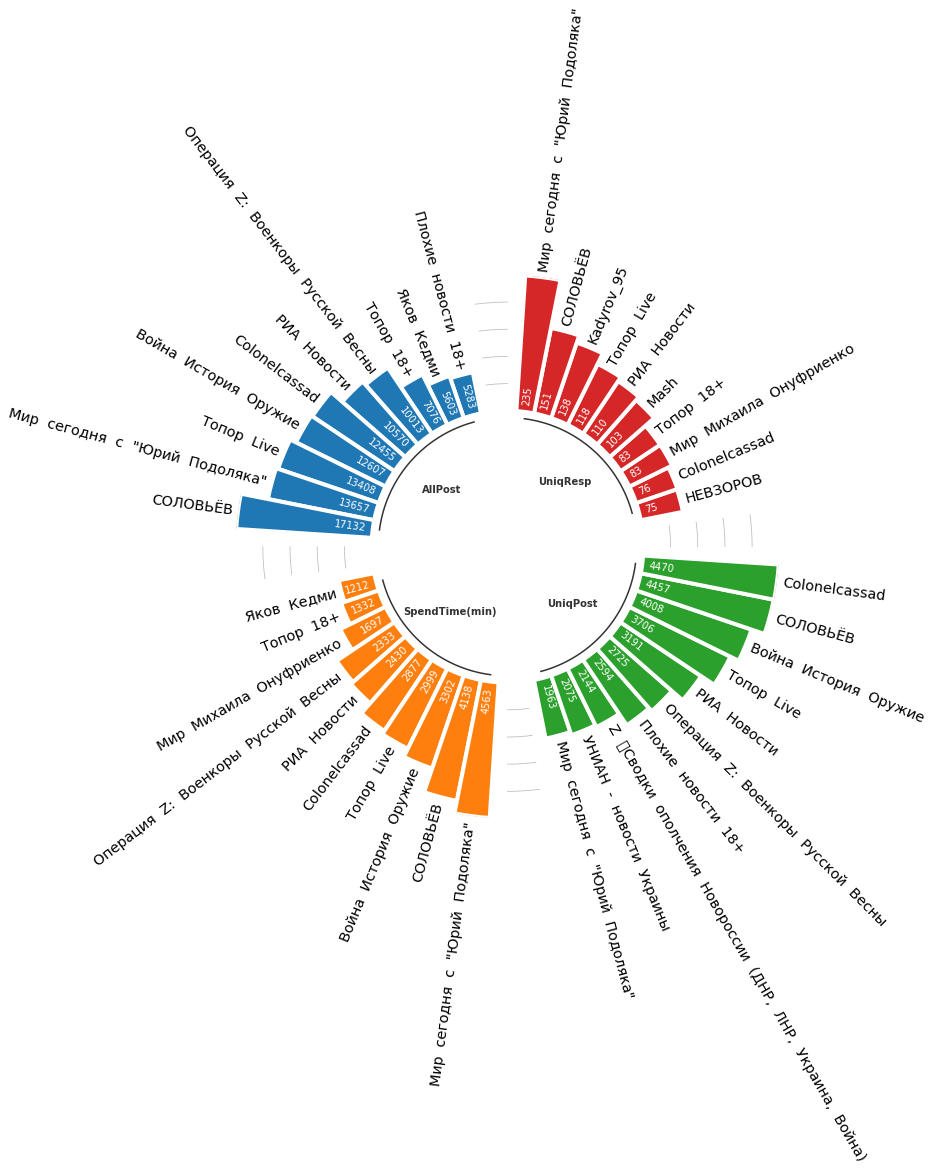

In [369]:
# All this part is like the code above
OFFSET = np.pi / 2
VALUES = df_sorted["value"].values 
LABELS = df_sorted["name"].values
GROUP = df_sorted["group"].values
RANK = df_sorted['rank'].values

PAD = 2
ANGLES_N = len(VALUES) + PAD * len(np.unique(GROUP))
ANGLES = np.linspace(0, 2 * np.pi, num=ANGLES_N, endpoint=False)
WIDTH = (2 * np.pi) / len(ANGLES)

offset = 0
IDXS = []
GROUPS_SIZE = [10, 10, 10, 10]
for size in GROUPS_SIZE:
    IDXS += list(range(offset + PAD, offset + size + PAD))
    offset += size + PAD

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={"projection": "polar"})
ax.set_theta_offset(OFFSET)
ax.set_ylim(-100, 100)
ax.set_frame_on(False)
ax.xaxis.grid(False)
ax.yaxis.grid(False)
ax.set_xticks([])
ax.set_yticks([])

GROUPS_SIZE = [10, 10, 10, 10]
COLORS = [f"C{i}" for i, size in enumerate(GROUPS_SIZE) for _ in range(size)]

ax.bar(
    ANGLES[IDXS], VALUES, width=WIDTH, color=COLORS, 
    edgecolor="white", linewidth=4
)

add_labels(ANGLES[IDXS], VALUES, LABELS, OFFSET, ax)
add_values(ANGLES[IDXS], VALUES, RANK, OFFSET, ax)
#add_labels(ANGLES[IDXS], VALUES, VALUES, OFFSET, ax)

# Extra customization below here --------------------

# This iterates over the sizes of the groups adding reference
# lines and annotations.

offset = 0 
for group, size in zip(["AllPost", "SpendTime(min)", "UniqPost", "UniqResp"], GROUPS_SIZE):
    # Add line below bars
    x1 = np.linspace(ANGLES[offset + PAD], ANGLES[offset + size + PAD - 1], num=40)
    ax.plot(x1, [-5] * 40, color="#333333")
    
    # Add text to indicate group
    ax.text(
        np.mean(x1), -36, group, color="#333333", fontsize=10, 
        fontweight="bold", ha="center", va="center"
    )
    
    # Add reference lines at 20, 40, 60, and 80
    x2 = np.linspace(ANGLES[offset], ANGLES[offset + PAD - 1], num=40)
    ax.plot(x2, [20] * 40, color="#bebebe", lw=0.8)
    ax.plot(x2, [40] * 40, color="#bebebe", lw=0.8)
    ax.plot(x2, [60] * 40, color="#bebebe", lw=0.8)
    ax.plot(x2, [80] * 40, color="#bebebe", lw=0.8)
    
    offset += size + PAD
#fig.savefig('my_plot.jpg', dpi=1000)
fig.savefig('foo.png', bbox_inches='tight')

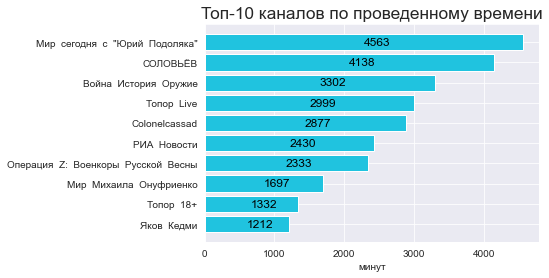

In [117]:
sns.set_style("darkgrid")
a.sort_values(by = 'value', inplace = True)
# Нарисуйте гистограмму
plt.barh(y = range(a.shape[0]),      # Укажите значение шкалы оси Y гистограммы
        width = a.value,               # Укажите значение оси x гистограммы
        tick_label = a.name,     # Укажите метку шкалы для оси Y гистограммы
        color = '#20c3df',               # Укажите цвет заливки гистограммы
       )
for y,x in enumerate(a.value):
    plt.text(x/2,y,'%s' %round(x,1), va='center', size='large', color='#000000') # Здесь x находится спереди, y сзади, метка значения добавляется к x, а центр также центрируется по вертикали
# Отображение графики   

plt.title('Топ-10 каналов по проведенному времени', size='xx-large')
plt.xlabel('минут')
plt.savefig('Top_spend_time.png', bbox_inches='tight', dpi=500)
plt.show()

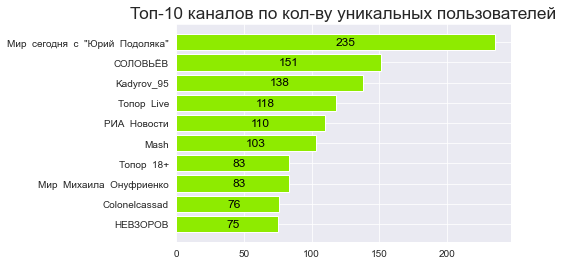

In [112]:
sns.set_style("darkgrid")
b.sort_values(by = 'value', inplace = True)
# Нарисуйте гистограмму
plt.barh(y = range(b.shape[0]),      # Укажите значение шкалы оси Y гистограммы
        width = b.value,               # Укажите значение оси x гистограммы
        tick_label = b.name,     # Укажите метку шкалы для оси Y гистограммы
        color = '#8EEB00',               # Укажите цвет заливки гистограммы
       )
for y,x in enumerate(b.value):
    plt.text(x/2,y,'%s' %round(x,1), va='center', size='large', color='#000000') # Здесь x находится спереди, y сзади, метка значения добавляется к x, а центр также центрируется по вертикали
# Отображение графики   

plt.title('Топ-10 каналов по кол-ву уникальных пользователей', size='xx-large')
#plt.xlabel('минут')
plt.savefig('Top_uniq_resp.png', bbox_inches='tight', dpi=500)
plt.show()

C:\Users\mikhail.gidroets\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 128293 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\mikhail.gidroets\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 128293 missing from current font.
  font.set_text(s, 0, flags=flags)


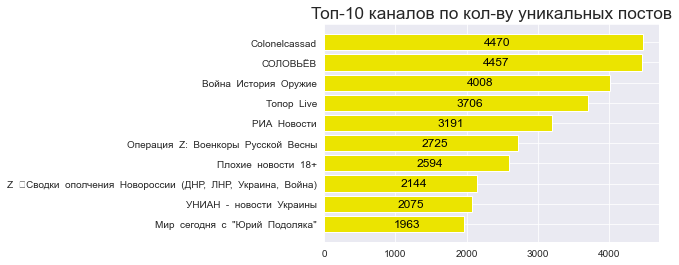

In [113]:
sns.set_style("darkgrid")
c.sort_values(by = 'value', inplace = True)
# Нарисуйте гистограмму
plt.barh(y = range(c.shape[0]),      # Укажите значение шкалы оси Y гистограммы
        width = c.value,               # Укажите значение оси x гистограммы
        tick_label = c.name,     # Укажите метку шкалы для оси Y гистограммы
        color = '#EBE400',               # Укажите цвет заливки гистограммы
       )
for y,x in enumerate(c.value):
    plt.text(x/2,y,'%s' %round(x,1), va='center', size='large', color='#000000') # Здесь x находится спереди, y сзади, метка значения добавляется к x, а центр также центрируется по вертикали
# Отображение графики   

plt.title('Топ-10 каналов по кол-ву уникальных постов', size='xx-large')
#plt.xlabel('минут')
plt.savefig('Top_uniq_post.png', bbox_inches='tight', dpi=500)
plt.show()

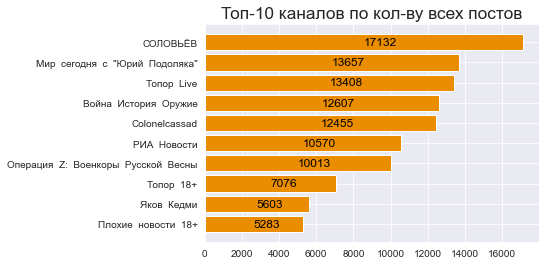

In [114]:
sns.set_style("darkgrid")
d.sort_values(by = 'value', inplace = True)
# Нарисуйте гистограмму
plt.barh(y = range(d.shape[0]),      # Укажите значение шкалы оси Y гистограммы
        width = d.value,               # Укажите значение оси x гистограммы
        tick_label = d.name,     # Укажите метку шкалы для оси Y гистограммы
        color = '#EB8D00',               # Укажите цвет заливки гистограммы
       )
for y,x in enumerate(d.value):
    plt.text(x/2,y,'%s' %round(x,1), va='center', size='large', color='#000000') # Здесь x находится спереди, y сзади, метка значения добавляется к x, а центр также центрируется по вертикали
# Отображение графики   

plt.title('Топ-10 каналов по кол-ву всех постов', size='xx-large')
#plt.xlabel('минут')
plt.savefig('Top_all_post.png', bbox_inches='tight', dpi=500)
plt.show()

In [158]:
df1 = pd.read_excel('heshte#.xlsx')

In [160]:
df = df1['Rank']

In [161]:
df_norm = (df - df.mean()) / (df.max() - df.min())

In [178]:
df

,Name,Rank,Value
49,#ужин,123,6.773986
48,#домашнее,125,6.892751
47,#Инсайд,129,7.130280
46,#выпечка,132,7.308428
45,#иллюзия_обмана,136,7.545957
44,#Европа,136,7.545957
43,#горячее,144,8.021017
42,#Пакистан,146,8.139782
41,#МыРаботаем,152,8.496076
40,#Wildberries,158,8.852371


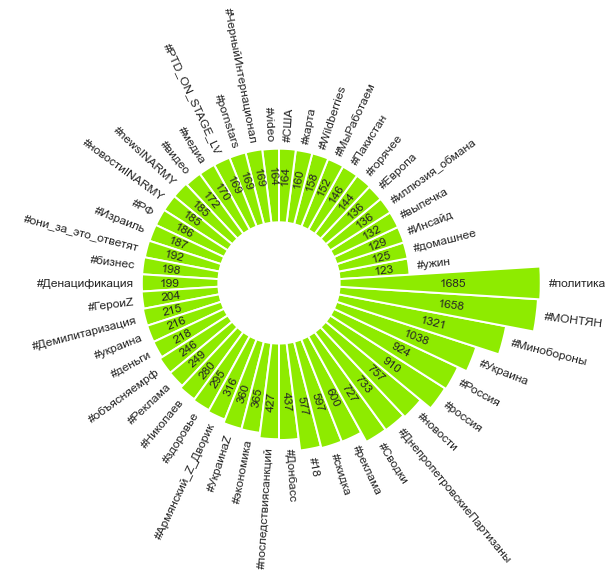

In [188]:
# Reorder the dataframe
df = df.sort_values(by=['Value'])

# initialize the figure
plt.figure(figsize=(20,10))
ax = plt.subplot(111, polar=True)
plt.axis('off')

# Constants = parameters controling the plot layout:
upperLimit = 100
lowerLimit = 30
labelPadding = 4

# Compute max and min in the dataset
max = df['Value'].max()

# Let's compute heights: they are a conversion of each item value in those new coordinates
# In our example, 0 in the dataset will be converted to the lowerLimit (10)
# The maximum will be converted to the upperLimit (100)
slope = (max - lowerLimit) / max
heights = slope * df.Value + lowerLimit

# Compute the width of each bar. In total we have 2*Pi = 360°
width = 2*np.pi / len(df.index)

# Compute the angle each bar is centered on:
indexes = list(range(1, len(df.index)+1))
angles = [element * width for element in indexes]
angles

# Draw bars
bars = ax.bar(
    x=angles, 
    height=heights, 
    width=width, 
    bottom=lowerLimit,
    linewidth=2, 
    edgecolor="white",
    color="#8EEB00",
)

# Add labels
for bar, angle, height, label, val  in zip(bars,angles, heights, df["Name"],  df["Rank"]):

    # Labels are rotated. Rotation must be specified in degrees :(
    rotation = np.rad2deg(angle)

    # Flip some labels upside down
    alignment = ""
    if angle >= np.pi/2 and angle < 3*np.pi/2:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"

    # Finally add the labels
    ax.text(
        x=angle, 
        y=lowerLimit + bar.get_height() + labelPadding, 
        s=label, 
        ha=alignment, 
        va='center', 
        rotation=rotation, 
        rotation_mode="anchor",
        size='large')
    
    ax.text(
        x=angle, 
        y=lowerLimit+ bar.get_height()/2, 
        s=val, 
        ha=alignment, 
        va='center', 
        rotation=rotation, 
        rotation_mode="anchor",
        size='large') 
plt.savefig('Top_#.png', bbox_inches='tight', dpi=500)   

In [189]:
df1 = pd.read_excel('heshte@.xlsx')

In [191]:
df = df1['Rank']

In [192]:
df_norm = (df - df.mean()) / (df.max() - df.min())

In [193]:
df_norm = df_norm*100

In [204]:
df = df1[:50]

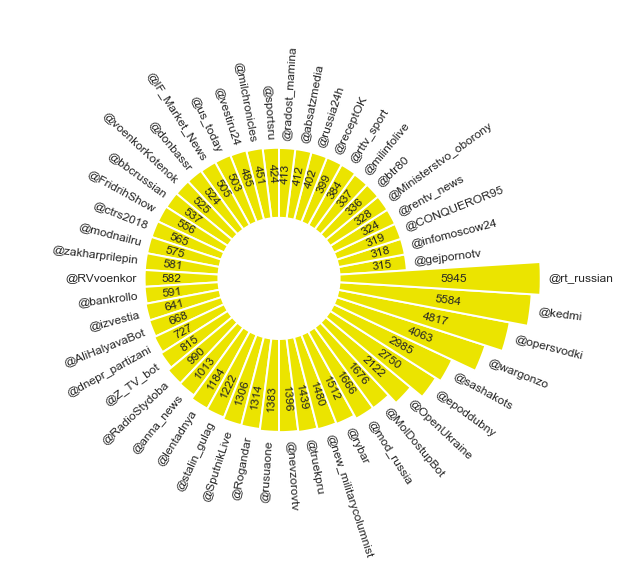

In [205]:
# Reorder the dataframe
df = df.sort_values(by=['Value'])

# initialize the figure
plt.figure(figsize=(20,10))
ax = plt.subplot(111, polar=True)
plt.axis('off')

# Constants = parameters controling the plot layout:
upperLimit = 100
lowerLimit = 30
labelPadding = 4

# Compute max and min in the dataset
max = df['Value'].max()

# Let's compute heights: they are a conversion of each item value in those new coordinates
# In our example, 0 in the dataset will be converted to the lowerLimit (10)
# The maximum will be converted to the upperLimit (100)
slope = (max - lowerLimit) / max
heights = slope * df.Value + lowerLimit

# Compute the width of each bar. In total we have 2*Pi = 360°
width = 2*np.pi / len(df.index)

# Compute the angle each bar is centered on:
indexes = list(range(1, len(df.index)+1))
angles = [element * width for element in indexes]
angles

# Draw bars
bars = ax.bar(
    x=angles, 
    height=heights, 
    width=width, 
    bottom=lowerLimit,
    linewidth=2, 
    edgecolor="white",
    color="#EBE400",
)

# Add labels
for bar, angle, height, label, val  in zip(bars,angles, heights, df["Name"],  df["Rank"]):
    # Labels are rotated. Rotation must be specified in degrees :(
    rotation = np.rad2deg(angle)

    # Flip some labels upside down
    alignment = ""
    if angle >= np.pi/2 and angle < 3*np.pi/2:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"

    # Finally add the labels
    ax.text(
        x=angle, 
        y=lowerLimit + bar.get_height() + labelPadding, 
        s=label, 
        ha=alignment, 
        va='center', 
        rotation=rotation, 
        rotation_mode="anchor",
        size='large')
    
    ax.text(
        x=angle, 
        y=lowerLimit+ bar.get_height()/2, 
        s=val, 
        ha=alignment, 
        va='center', 
        rotation=rotation, 
        rotation_mode="anchor",
        size='large') 
plt.savefig('Top_@.png', bbox_inches='tight', dpi=500)   

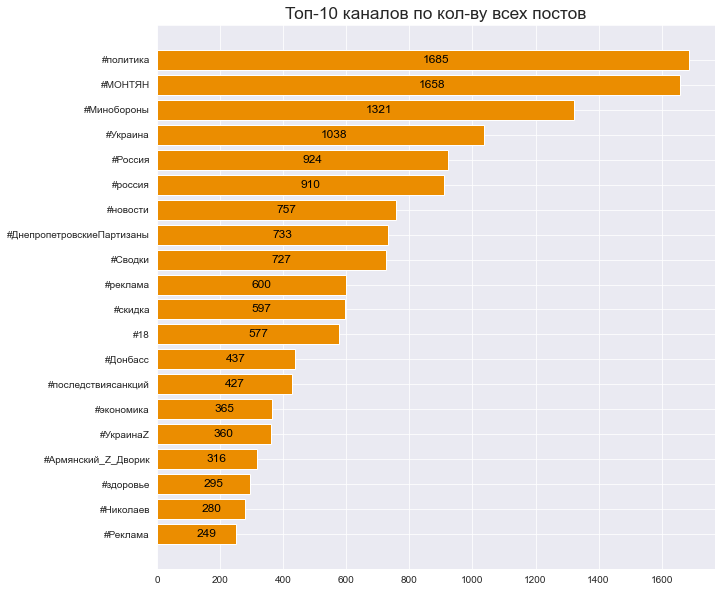

In [152]:
plt.subplots(figsize=(10, 10))
sns.set_style("darkgrid")
df.sort_values(by = 'Value', inplace = True)
# Нарисуйте гистограмму
plt.barh(y = range(df.shape[0]),      # Укажите значение шкалы оси Y гистограммы
        width = df.Value,               # Укажите значение оси x гистограммы
        tick_label = df.Name,     # Укажите метку шкалы для оси Y гистограммы
        color = '#EB8D00',               # Укажите цвет заливки гистограммы
       )
for y,x in enumerate(df.Value):
    plt.text(x/2,y,'%s' %round(x,1), va='center', size='large', color='#000000') # Здесь x находится спереди, y сзади, метка значения добавляется к x, а центр также центрируется по вертикали
# Отображение графики   

plt.title('Топ-10 каналов по кол-ву всех постов', size='xx-large')
#plt.xlabel('минут')
plt.savefig('heshte#.png', bbox_inches='tight', dpi=500)
plt.show()